In [394]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm

In [395]:
#ML Packages
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [396]:
#load dataset
data = pd.read_csv("international_matches.csv")
data.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [397]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [398]:
data.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [399]:
#check jika ada missing value
data.isna().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [400]:
data.keys()

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [401]:
data.values

array([['1993-08-08', 'Bolivia', 'Uruguay', ..., nan, nan, nan],
       ['1993-08-08', 'Brazil', 'Mexico', ..., nan, nan, nan],
       ['1993-08-08', 'Ecuador', 'Venezuela', ..., nan, nan, nan],
       ...,
       ['2022-06-14', 'Chile', 'Ghana', ..., 75.5, 76.0, 78.2],
       ['2022-06-14', 'Japan', 'Tunisia', ..., 70.8, 72.3, 74.0],
       ['2022-06-14', 'Korea Republic', 'Egypt', ..., nan, 79.3, 70.8]],
      dtype=object)

In [402]:
data.shape

(23921, 25)

In [403]:
#target distribusi
print(data.groupby('home_team_result').size())

home_team_result
Draw     5389
Lose     6771
Win     11761
dtype: int64


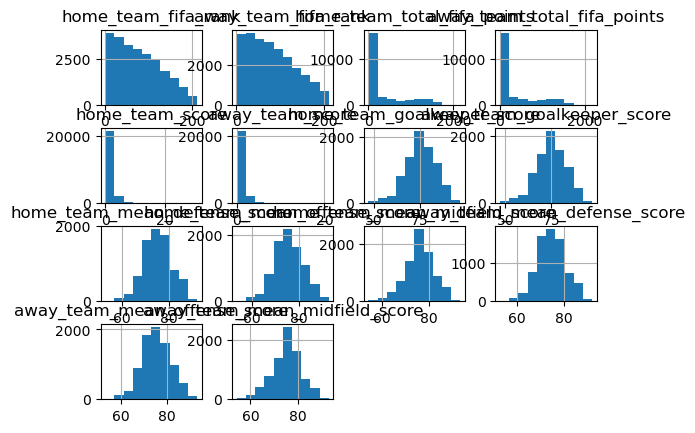

In [404]:
#histogram 
data.hist()
plt.show()

<AxesSubplot:>

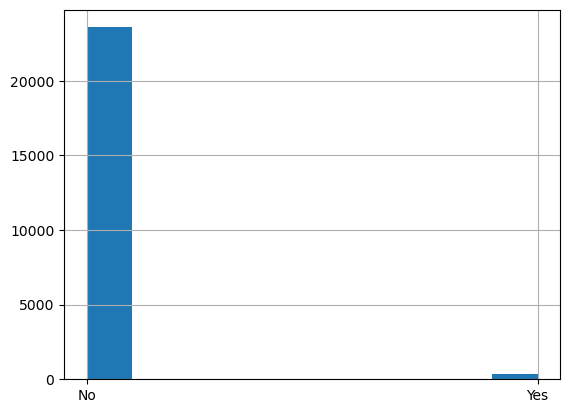

In [405]:
data['shoot_out'].hist()

C:\Users\WAYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_team_result', ylabel='count'>

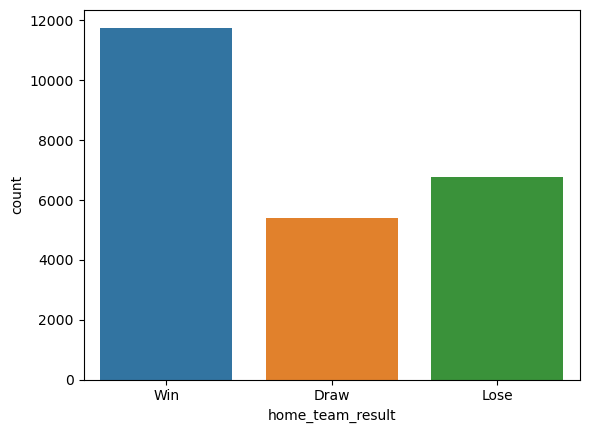

In [406]:
sns.countplot(data['home_team_result'])

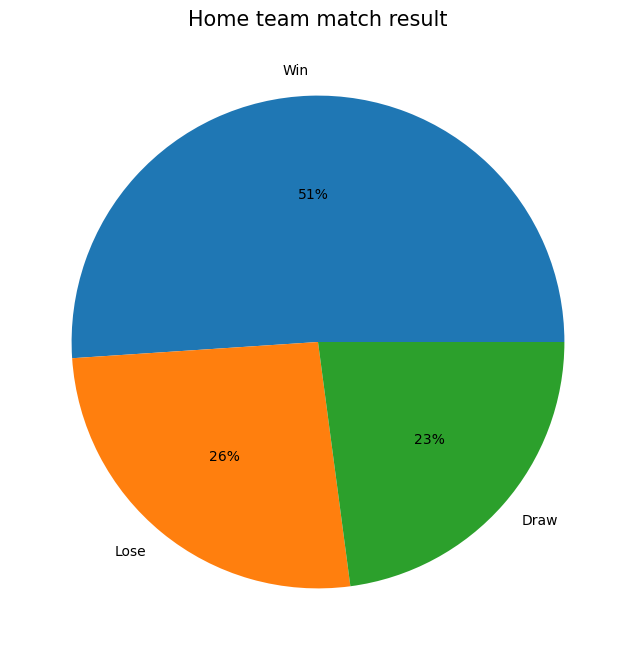

In [407]:
#select all matches played at non-neutral locations
home_team_advantage = data[data['neutral_location']==False]['home_team_result'].value_counts(normalize=True)

#plot
fig, axes = plt.subplots(1,1,  figsize=(8,8))
ax =plt.pie(home_team_advantage  ,labels = ['Win',  'Lose', 'Draw'],  autopct='%.0f%%')
plt.title('Home team match result', fontsize = 15)
plt.show()

In [408]:
#check jika ada missing value
data.isna().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [409]:
data['home_team_goalkeeper_score']=data['home_team_goalkeeper_score'].fillna(data['home_team_goalkeeper_score'].median())
data['away_team_goalkeeper_score']=data['away_team_goalkeeper_score'].fillna(data['away_team_goalkeeper_score'].median())
data['home_team_mean_defense_score']=data['home_team_mean_defense_score'].fillna(data['home_team_mean_defense_score'].median())
data['home_team_mean_offense_score']=data['home_team_mean_offense_score'].fillna(data['home_team_mean_offense_score'].median())
data['home_team_mean_midfield_score']=data['home_team_mean_midfield_score'].fillna(data['home_team_mean_midfield_score'].median())
data['away_team_mean_defense_score']=data['away_team_mean_defense_score'].fillna(data['away_team_mean_defense_score'].median())
data['away_team_mean_offense_score']=data['away_team_mean_offense_score'].fillna(data['away_team_mean_offense_score'].median())
data['away_team_mean_midfield_score']=data['away_team_mean_midfield_score'].fillna(data['away_team_mean_midfield_score'].median())

In [410]:
data.isna().sum()

date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

In [411]:
#Mengecek jumlah data yang duplikat
data.duplicated().sum()

0

In [412]:
data.drop(['date'],axis=1,inplace=True)

In [413]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   home_team                      23921 non-null  object 
 1   away_team                      23921 non-null  object 
 2   home_team_continent            23921 non-null  object 
 3   away_team_continent            23921 non-null  object 
 4   home_team_fifa_rank            23921 non-null  int64  
 5   away_team_fifa_rank            23921 non-null  int64  
 6   home_team_total_fifa_points    23921 non-null  int64  
 7   away_team_total_fifa_points    23921 non-null  int64  
 8   home_team_score                23921 non-null  int64  
 9   away_team_score                23921 non-null  int64  
 10  tournament                     23921 non-null  object 
 11  city                           23921 non-null  object 
 12  country                        23921 non-null 

In [414]:
objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['home_team', 'away_team', 'home_team_continent', 'away_team_continent',
       'tournament', 'city', 'country', 'shoot_out', 'home_team_result'],
      dtype='object')


In [415]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    data['home_team'] = le.fit_transform(data['home_team'].astype(str))
    data['away_team'] = le.fit_transform(data['away_team'].astype(str))
    data['home_team_continent'] = le.fit_transform(data['home_team_continent'].astype(str))
    data['away_team_continent'] = le.fit_transform(data['away_team_continent'].astype(str))
    data['tournament'] = le.fit_transform(data['tournament'].astype(str))
    data['city'] = le.fit_transform(data['city'].astype(str))
    data['country'] = le.fit_transform(data['country'].astype(str))
    data['shoot_out'] = le.fit_transform(data['shoot_out'].astype(str))
    data['home_team_result'] = le.fit_transform(data['home_team_result'].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   home_team                      23921 non-null  int32  
 1   away_team                      23921 non-null  int32  
 2   home_team_continent            23921 non-null  int32  
 3   away_team_continent            23921 non-null  int32  
 4   home_team_fifa_rank            23921 non-null  int64  
 5   away_team_fifa_rank            23921 non-null  int64  
 6   home_team_total_fifa_points    23921 non-null  int64  
 7   away_team_total_fifa_points    23921 non-null  int64  
 8   home_team_score                23921 non-null  int64  
 9   away_team_score                23921 non-null  int64  
 10  tournament                     23921 non-null  int32  
 11  city                           23921 non-null  int32  
 12  country                        23921 non-null 

In [416]:
boljList = data.select_dtypes(include = "bool").columns
print (boljList)

Index(['neutral_location'], dtype='object')


In [417]:
data['neutral_location'] = le.fit_transform(data['neutral_location'].astype(str))

In [418]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   home_team                      23921 non-null  int32  
 1   away_team                      23921 non-null  int32  
 2   home_team_continent            23921 non-null  int32  
 3   away_team_continent            23921 non-null  int32  
 4   home_team_fifa_rank            23921 non-null  int64  
 5   away_team_fifa_rank            23921 non-null  int64  
 6   home_team_total_fifa_points    23921 non-null  int64  
 7   away_team_total_fifa_points    23921 non-null  int64  
 8   home_team_score                23921 non-null  int64  
 9   away_team_score                23921 non-null  int64  
 10  tournament                     23921 non-null  int32  
 11  city                           23921 non-null  int32  
 12  country                        23921 non-null 

In [419]:
data

,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,74,210,5,5,59,22,0,0,3,1,...,0,2,75.0,74.0,75.2,75.7,76.2,74.5,75.3,75.5
1,81,174,5,3,8,14,0,0,1,1,...,0,0,75.0,74.0,75.2,75.7,76.2,74.5,75.3,75.5
2,129,56,5,5,35,94,0,0,5,0,...,0,2,75.0,74.0,75.2,75.7,76.2,74.5,75.3,75.5
3,14,34,0,0,65,86,0,0,1,0,...,0,2,75.0,74.0,75.2,75.7,76.2,74.5,75.3,75.5
4,20,160,5,5,67,5,0,0,1,3,...,0,1,75.0,74.0,75.2,75.7,76.2,74.5,75.3,75.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,179,107,2,2,180,153,932,1040,2,1,...,0,2,65.0,74.0,75.2,75.7,76.2,74.5,75.3,75.5
23917,13,196,2,2,192,135,895,1105,0,2,...,0,1,75.0,65.0,75.2,75.7,76.2,74.5,75.3,75.5
23918,109,141,5,0,28,60,1526,1387,0,0,...,1,1,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,155,146,1,0,23,35,1553,1499,0,3,...,0,1,73.0,74.0,75.2,75.0,77.5,70.8,72.3,74.0


In [420]:
x = data.drop(columns=['home_team_result'])
y = data['home_team_result']

len(y)

23921

In [421]:
corr = x.corr()

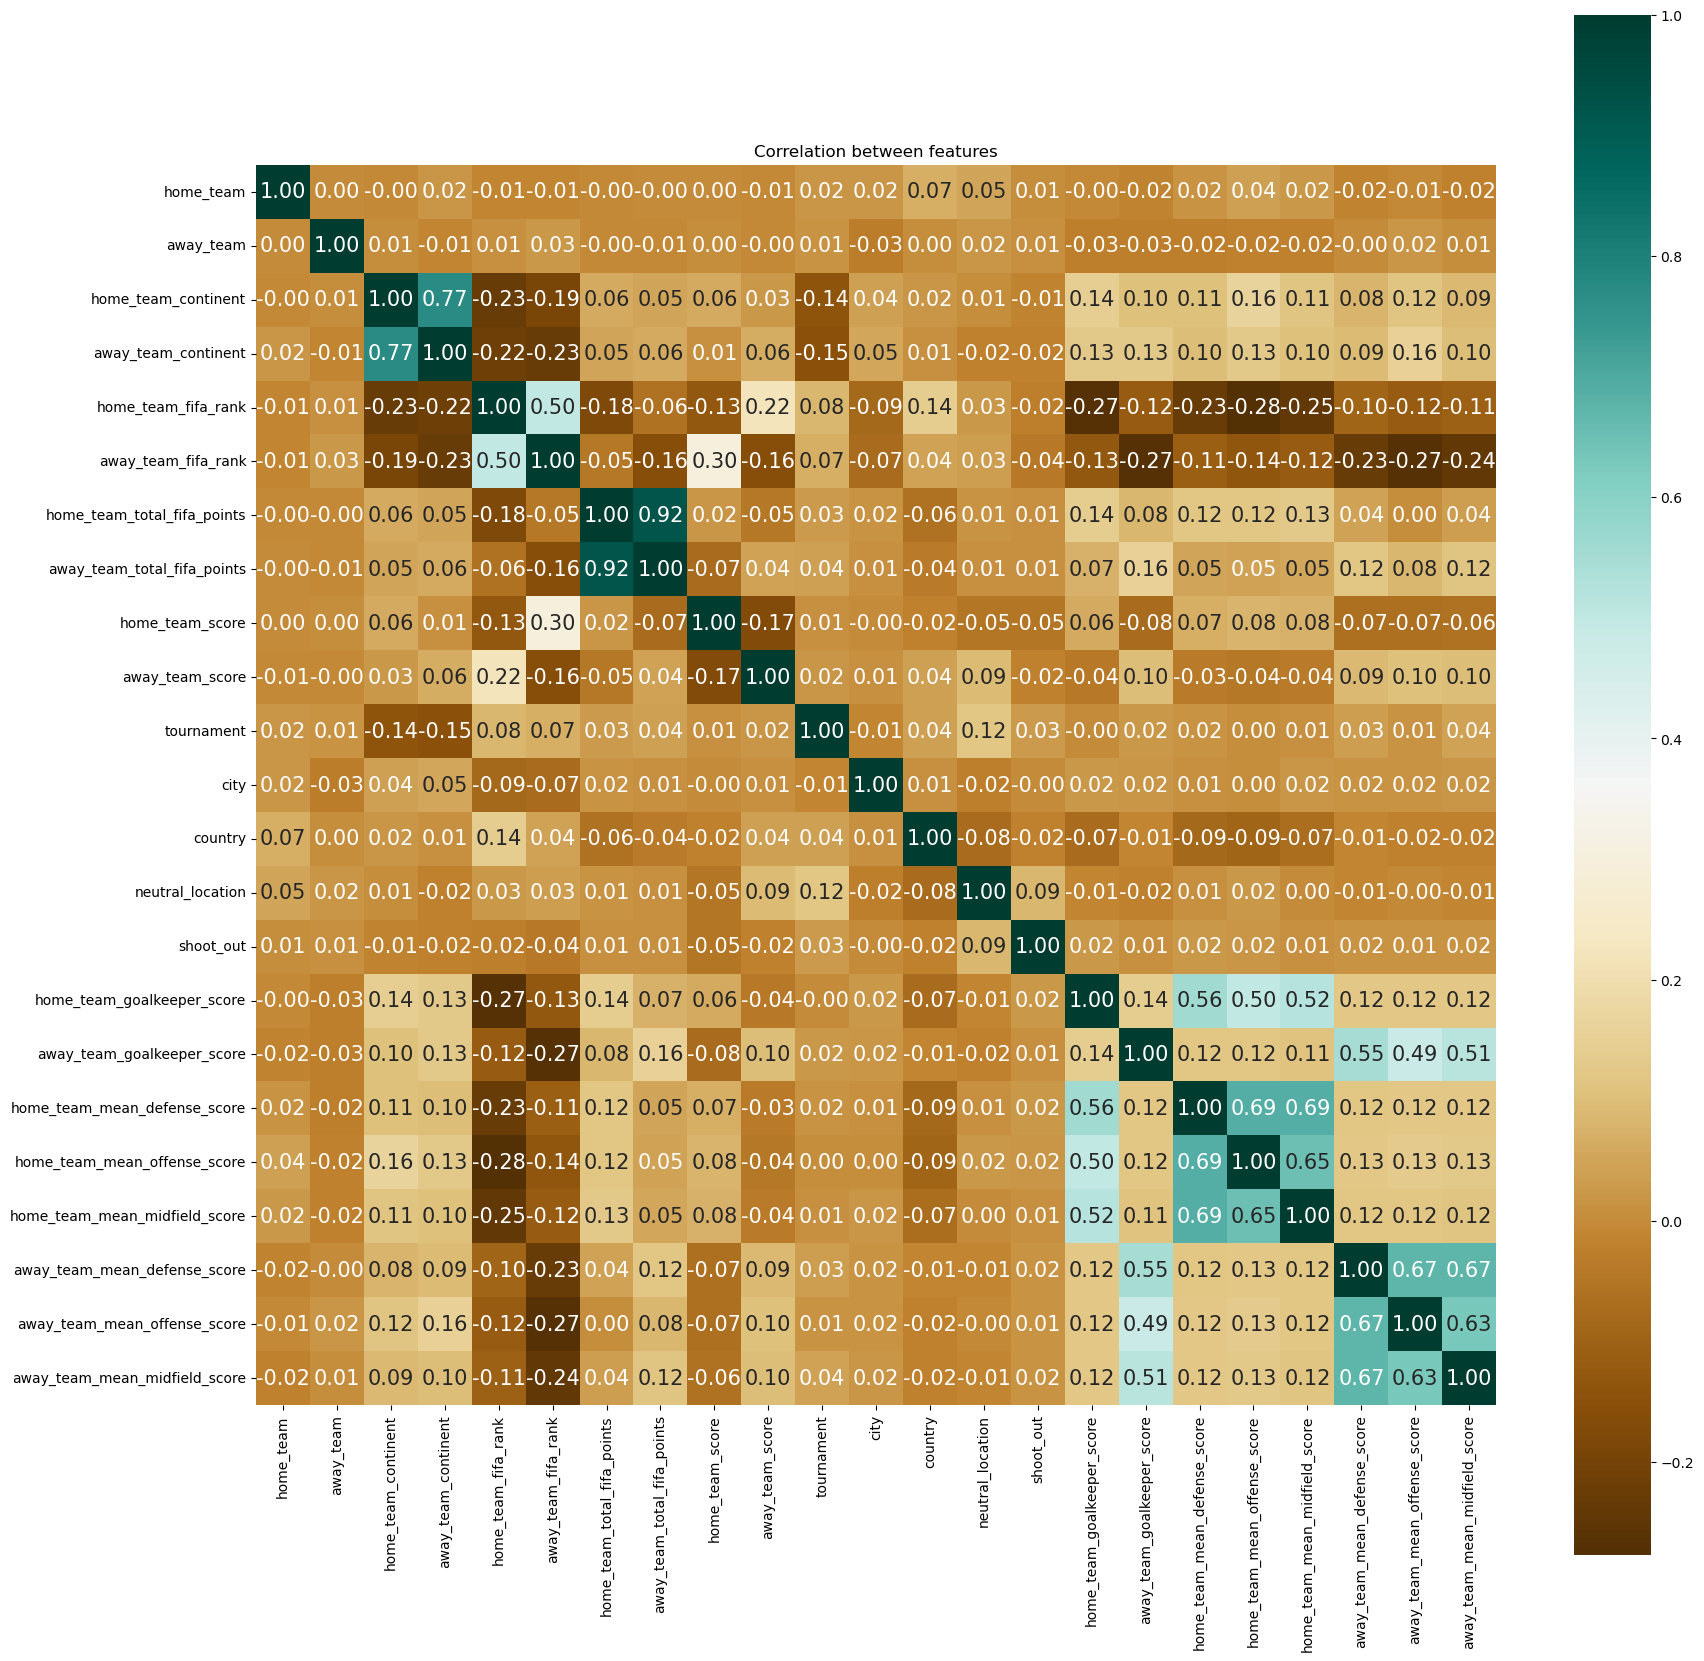

In [422]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'BrBG')
plt.title('Correlation between features');

In [423]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=3)

In [424]:
#import Scaler 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [425]:
x_train

array([[0.78571429, 0.06190476, 0.4       , ..., 0.55641026, 0.55415617,
        0.54615385],
       [0.47142857, 0.23333333, 0.2       , ..., 0.55641026, 0.55415617,
        0.54615385],
       [0.47619048, 0.7952381 , 0.4       , ..., 0.64102564, 0.58942065,
        0.76923077],
       ...,
       [0.25714286, 0.73809524, 0.2       , ..., 0.55641026, 0.46347607,
        0.5974359 ],
       [0.72857143, 0.9       , 0.6       , ..., 0.55641026, 0.55415617,
        0.54615385],
       [0.21904762, 0.88571429, 1.        , ..., 0.55641026, 0.55415617,
        0.54615385]])

In [426]:
y_train

822      2
11630    0
22849    0
13575    0
3212     2
        ..
6400     1
15288    1
11513    1
1688     0
5994     0
Name: home_team_result, Length: 19136, dtype: int32

In [427]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = AdaBoostClassifier(random_state=0)
model.fit(x_train,y_train)

AdaBoostClassifier(random_state=0)

In [428]:
y_predict = model.predict(x_test)
y_predict

array([2, 2, 0, ..., 0, 2, 0])

In [429]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1077,    0,    0],
       [ 677,  657,   14],
       [  21,   19, 2320]], dtype=int64)

<AxesSubplot:>

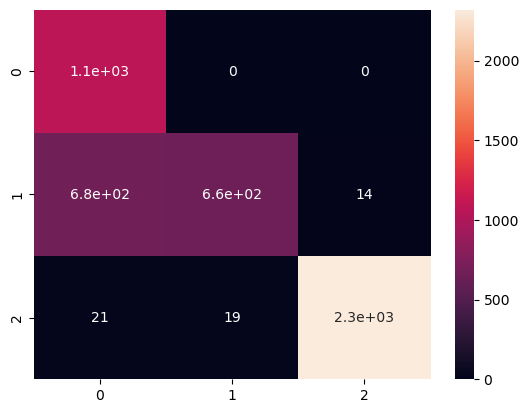

In [430]:
sns.heatmap(cm, annot=True)

In [431]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1077
           1       0.97      0.49      0.65      1348
           2       0.99      0.98      0.99      2360

    accuracy                           0.85      4785
   macro avg       0.86      0.82      0.80      4785
weighted avg       0.90      0.85      0.84      4785



In [432]:
print("accuracy : ", model.score(x_test,y_test))

accuracy :  0.8472309299895506


In [433]:
import pickle
Pkl_Filename = "adabost.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [434]:
#load back
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)
Pickled_LR_Model

AdaBoostClassifier(random_state=0)